In [1]:
from NeuralNetwork import NeuralNetwork, FC, VGG, VGG16, EfficientNetB0
from Dataset import Dataset, SPIRAL, MOON, CIRCLE, MNIST, Fashion_MNIST, CIFAR10
from NeuroEvolution import NeuroEvolution
from tensorflow import keras
from Representation import Function, PAU
from Activation import PANGAEA_Activation, Pade_Activation_Unit
import tensorflow as tf
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from numpy import random
from Swarm import Star, Swarm
import numpy as np
import copy 
from emnist import extract_training_samples, extract_test_samples

np.set_printoptions(suppress=True)

In [2]:
exp_df = pd.DataFrame(columns=['activation', 'data', 'validation', 'test', 'epoch time'])


In [65]:
dataset = MNIST


dataset_train = dataset(label_noise=0, training_split=.8)
dataset_test = dataset(label_noise=0, training_split=1.)

input_shape = (2)

spiral_dataset = SPIRAL(10000, 1, input_shape)
circle_dataset = CIRCLE(10000, 0.02, input_shape, training_split=.8)
moon_dataset = MOON(10000, 0.1, input_shape)

neurons = 50
layers = 2
blocks = 3

nn = VGG(dataset_train, blocks)

rep =5
metric = keras.metrics.CategoricalAccuracy()
loss_noise = 0.
activation_noise = 0.
input_noise = 0.
gradient_noise =  0.
weight_noise = 6
label_smoothing = 0.0
gradient_dropout = 0.
dropout = 0.0
drop_connect = 0.
batch_size = 128
batch_schedule = 0.
drnn = 0.
weight_std =  0.06
verbose = 1
epochs_search = 20
epochs_test = 50
iterations = 100000000
patience = np.inf
save_best = False
sleep = 6.
cut_threshold = 0.12
#max_batch = len(nn.dataset.X_train)
batch_range = [128, 1024]
random_flip=1
random_rotation=0.0
random_zoom=0.0
random_translation=0.0
random_contrast=0.
shuffle = 1
lr = 3
optimizer = 3
lr_schedule = -0.6
lr_range = [1, 5]



nn.set_config(shuffle, random_flip, random_rotation, random_zoom, random_translation, random_contrast, input_noise,
              label_smoothing, weight_std, dropout, drop_connect, drnn, activation_noise, loss_noise,
              optimizer, lr, lr_schedule, batch_size, batch_schedule, weight_noise, gradient_noise, gradient_dropout,              
              metric, epochs_search, iterations, patience, verbose=verbose,
              batch_range=batch_range, lr_range=lr_range, sleep=sleep, save_best=save_best, cut_threshold=cut_threshold)
nn.create_model()


In [20]:
nn.fit()


Start of epoch 0
cuurent batch: 128
Training acc: 0.9642
Validation acc: 0.7953
Time taken: 9.94s
Patience:  1

Start of epoch 1
cuurent batch: 128
Training acc: 0.9888
Validation acc: 0.9890
Time taken: 9.11s
Patience:  1

Start of epoch 2
cuurent batch: 128
Training acc: 0.9926
Validation acc: 0.9911
Time taken: 8.89s
Patience:  1

Start of epoch 3
cuurent batch: 128
Training acc: 0.9942
Validation acc: 0.9879
Time taken: 8.73s
Patience:  1

Start of epoch 4
cuurent batch: 128
Training acc: 0.9951
Validation acc: 0.9907
Time taken: 9.12s
Patience:  2

Start of epoch 5
cuurent batch: 128
Training acc: 0.9983
Validation acc: 0.9898
Time taken: 8.88s
Patience:  3

Start of epoch 6
cuurent batch: 128
Training acc: 0.9995
Validation acc: 0.9936
Time taken: 8.90s
Patience:  4

Start of epoch 7
cuurent batch: 128
Training acc: 1.0000
Validation acc: 0.9937
Time taken: 9.16s
Patience:  1

Start of epoch 8
cuurent batch: 128
Training acc: 1.0000
Validation acc: 0.9942
Time taken: 8.85s
Patie

In [4]:
exp_file = str(type(nn).__name__)+'_'+str(type(nn.dataset).__name__)+'.xlsx'
exp_df = pd.read_excel(exp_file)

In [5]:
exp_df

,method,shuffle,flip,rotation,zoom,translation,contrast,input noise,label smoothing,weight init,...,loss noise,optimizer,lr,lr schedule,batch,batch schedule,weight noise,gradient noise,gradient dropout,test
0,pso-saga,0.000000,1.000000,0.025083,0.035558,0.000000,0.001392,0.000000,0.600706,0.030371,...,0.000000,2.000000,3.649326,-0.129970,380.561768,-1.000000,6.000000,0.00000,0.041741,0.9965
1,pso-saga,0.156573,0.837427,0.000000,0.080000,0.045949,0.000452,0.011467,0.056175,0.012894,...,0.505748,1.479151,4.037340,-0.606993,380.571066,0.859880,5.671054,0.40000,0.044681,0.9959
2,pso-saga,0.240282,0.428626,0.018173,0.056507,0.000000,0.000000,0.138699,0.002746,0.040763,...,0.382329,1.709111,3.900440,-0.285671,303.412319,0.491012,6.000000,0.47843,0.069311,0.9963
3,pso-saga,0.478623,0.303097,0.000000,0.101859,0.000000,0.024522,0.000000,0.089734,0.025452,...,0.410411,2.048641,2.949848,-0.391580,128.000000,0.530705,6.000000,0.00000,0.000009,0.9960
4,pso-saga,0.544164,0.862054,0.000000,0.000000,0.000000,0.047180,0.000000,0.125783,0.039396,...,0.000000,1.883214,3.607543,0.406622,582.959491,-0.120532,4.672190,0.03827,0.013818,0.9963
5,pso,0.065755,0.306516,0.025083,0.035558,0.000000,0.001392,0.000000,0.600706,0.030371,...,0.000000,1.902422,3.649326,-0.129970,380.561768,-1.000000,6.000000,0.00000,0.041741,0.9960
6,pso,0.065755,0.306516,0.025083,0.035558,0.000000,0.001392,0.000000,0.600706,0.030371,...,0.000000,1.902422,3.649326,-0.129970,380.561768,-1.000000,6.000000,0.00000,0.041741,0.9964
7,pso,0.065755,0.306516,0.025083,0.035558,0.000000,0.001392,0.000000,0.600706,0.030371,...,0.000000,1.902422,3.649326,-0.129970,380.561768,-1.000000,6.000000,0.00000,0.041741,0.9964
8,pso,0.065755,0.306516,0.025083,0.035558,0.000000,0.001392,0.000000,0.600706,0.030371,...,0.000000,1.902422,3.649326,-0.129970,380.561768,-1.000000,6.000000,0.00000,0.041741,0.9965
9,pso,0.065755,0.306516,0.025083,0.035558,0.000000,0.001392,0.000000,0.600706,0.030371,...,0.000000,1.902422,3.649326,-0.129970,380.561768,-1.000000,6.000000,0.00000,0.041741,0.9964


shuffle               0.000000
flip                  1.000000
rotation              0.025083
zoom                  0.035558
translation           0.000000
contrast              0.001392
input noise           0.000000
label smoothing       0.600706
weight init           0.030371
dropout               0.000000
dropconnect           0.000000
drnn                  0.000000
activation noise      0.062499
loss noise            0.000000
optimizer             2.000000
lr                    3.649326
lr schedule          -0.651988
batch               380.561768
batch schedule       -1.000000
weight noise          6.000000
gradient noise        0.000000
gradient dropout      0.041741
Name: 0, dtype: float64

loss_noise: 0.0 , activation_noise: 0.06249908357858658 , input_noise: 0.0 , label_smoothing: 0.6007060408592224 , weight_noise: 0 , gradient_dropout: 0.04174071177840233 , gradient_noise: 0.0 , batch_size: 381 , dropout: 0.0 , drop_connect: 0.0 , batch_schedule: 1 , drnn: 0.0 , weight_std: 0

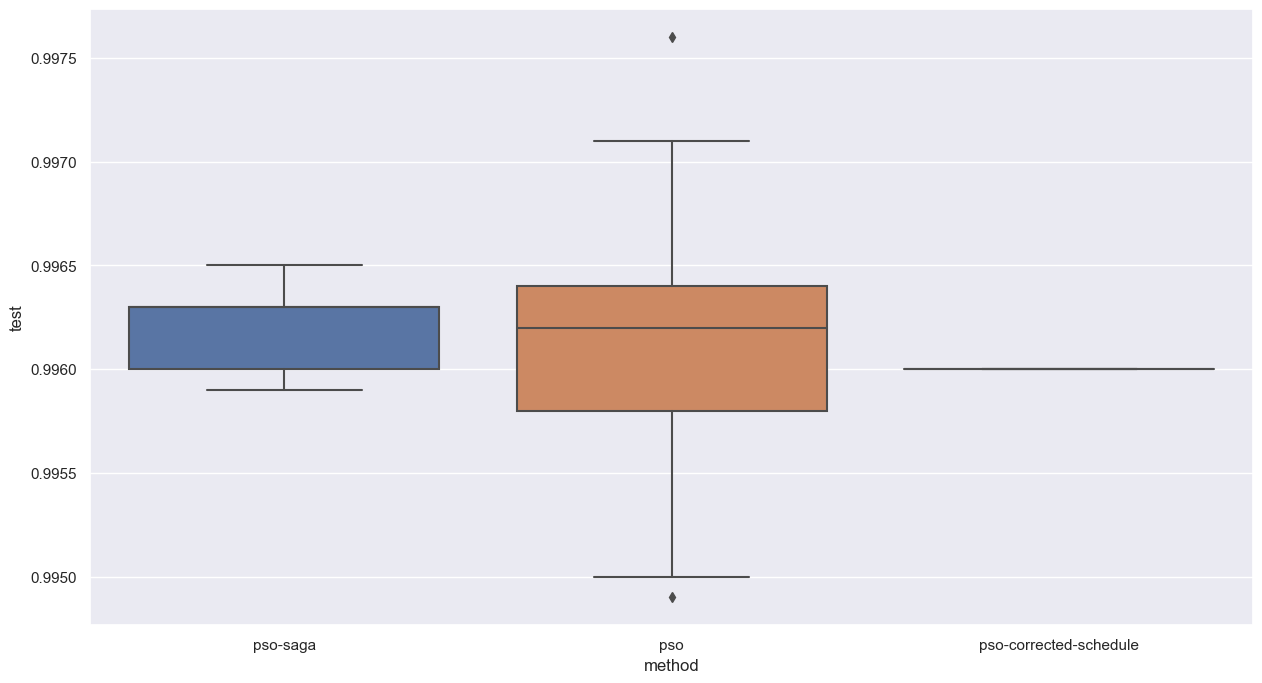


loss_noise: 0.0 , activation_noise: 0.06249908357858658 , input_noise: 0.0 , label_smoothing: 0.6007060408592224 , weight_noise: 0 , gradient_dropout: 0.04174071177840233 , gradient_noise: 0.0 , batch_size: 381 , dropout: 0.0 , drop_connect: 0.0 , batch_schedule: 1 , drnn: 0.0 , weight_std: 0.030371397733688354 , flip: 1 , rotation: 0.025083329528570175 , zoom: 0.035557590425014496 , translation: 0.0 , contrast: 0.0013923661317676306 , shuffle: 0 , lr: 0.00022421989888082863 , optimizer: 2 , lr_schedule: 18 , batch_increase: 0 , lr_increase: 0

Start of epoch 0
cuurent batch: 381
Training acc: 0.9300
Time taken: 6.38s
Patience:  1

Start of epoch 1
cuurent batch: 190
Training acc: 0.9858
Time taken: 8.02s
Patience:  2

Start of epoch 2
cuurent batch: 128
Training acc: 0.9894
Time taken: 10.56s
Patience:  3

Start of epoch 3
cuurent batch: 128
Training acc: 0.9912
Time taken: 10.89s
Patience:  4

Start of epoch 4
cuurent batch: 128
Training acc: 0.9924
Time taken: 10.58s
Patience:  5



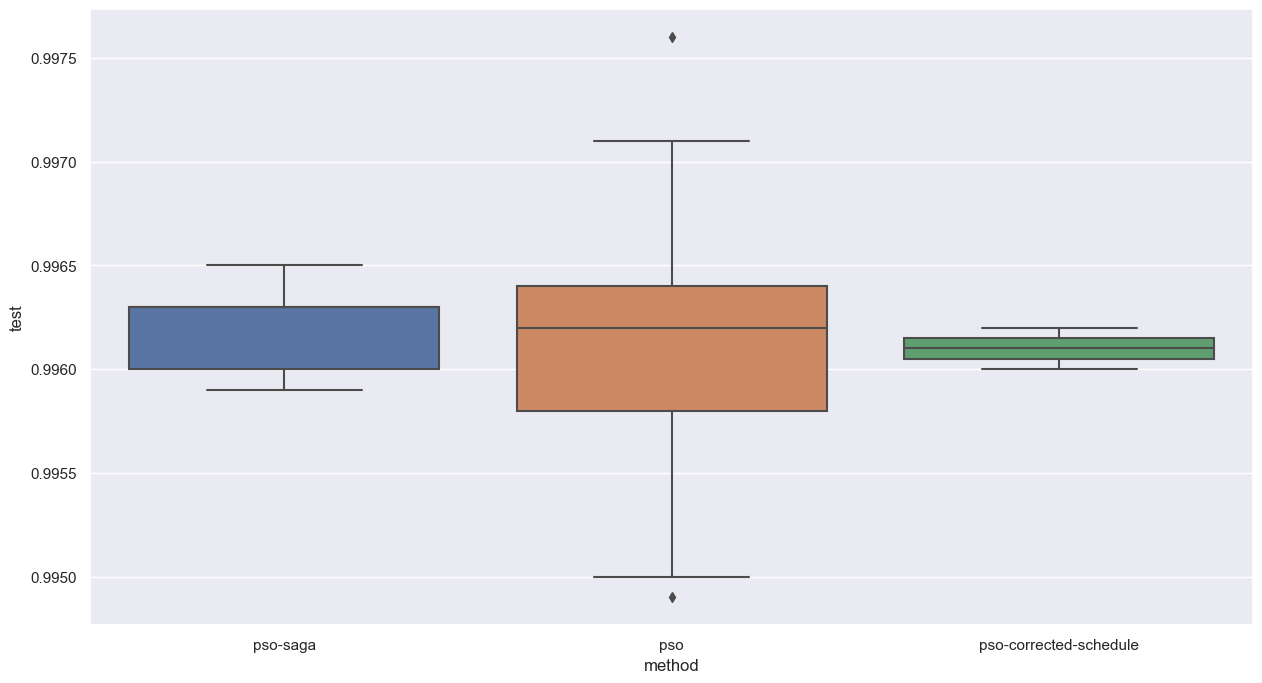


loss_noise: 0.0 , activation_noise: 0.06249908357858658 , input_noise: 0.0 , label_smoothing: 0.6007060408592224 , weight_noise: 0 , gradient_dropout: 0.04174071177840233 , gradient_noise: 0.0 , batch_size: 381 , dropout: 0.0 , drop_connect: 0.0 , batch_schedule: 1 , drnn: 0.0 , weight_std: 0.030371397733688354 , flip: 1 , rotation: 0.025083329528570175 , zoom: 0.035557590425014496 , translation: 0.0 , contrast: 0.0013923661317676306 , shuffle: 0 , lr: 0.00022421989888082863 , optimizer: 2 , lr_schedule: 18 , batch_increase: 0 , lr_increase: 0

Start of epoch 0
cuurent batch: 381
Training acc: 0.9250
Time taken: 6.41s
Patience:  1

Start of epoch 1
cuurent batch: 190
Training acc: 0.9859
Time taken: 7.84s
Patience:  2

Start of epoch 2
cuurent batch: 128
Training acc: 0.9898
Time taken: 10.58s
Patience:  3

Start of epoch 3
cuurent batch: 128
Training acc: 0.9916
Time taken: 10.59s
Patience:  4

Start of epoch 4
cuurent batch: 128
Training acc: 0.9929
Time taken: 10.80s
Patience:  5



In [ ]:
for idx, row in exp_df[exp_df['method'] == 'pso-saga'].iloc[:, 1:].iterrows():
            nn.dataset = dataset_test
            nn.epochs = epochs_test

            setting = row.astype(np.float32)[:-1]
            if (setting[16] > 0):
                setting[16] = np.abs(setting[16])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test)
            else:
                setting[16] = -1 * (np.abs(setting[16])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test))
                
            if (setting[18] > 0):
                setting[18] = np.abs(setting[18])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test)
            else:
                setting[18] = -1 * (np.abs(setting[18])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test))
            
            print(setting)
            for _ in range(5):
                fitness = NeuroEvolution.evaluate(setting, [nn], test_time=True, verbose=1)[0]
                line = []
                line .append('pso-corrected-schedule')
                for value in setting[:]:
                    line.append(value)
                line.append(fitness)
                exp_df.loc[len(exp_df)] = line
                sns.set(rc={'figure.figsize':(15,8)})
                sns.boxplot(x='method', y='test', data=exp_df)
                plt.show()
                exp_df.to_excel(exp_file, index=False)

In [51]:
exp_df.to_excel(exp_file, index=False)

In [14]:
row = [ nn.test_score, nn.training_time, nn.inference_time]

print(row)
    

[0.9894000291824341, 182.99851322174072, 0.8003153800964355]


In [15]:
score_test = nn.model.evaluate(nn.dataset.X_test, nn.dataset.y_test, verbose=0)
nn.test_score = score_test[1]
nn.test_loss = score_test[0]

In [56]:
epochs_search = 20
epochs_test = 50

lr_schedule_search = -0.12
print(int(((1-np.abs(lr_schedule_search)) * epochs_search)+1))


lr_schedule_test = np.abs(lr_schedule_search)*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test)

print(int(((1-np.abs(lr_schedule_test)) * epochs_test)+1))


18
18


In [57]:
np.abs(lr_schedule_search)*(epochs_search/epochs_test)

0.048

In [5]:
exp_df = pd.DataFrame(columns=['method', 'shuffle', 'flip', 'rotation', 'zoom', 'translation', 'contrast'
                               , 'input noise' , 'label smoothing' , 'weight init', 'dropout', 'dropconnect',
                               'drnn', 'activation noise', 'loss noise', 
                               'optimizer', 'lr', 'lr schedule', 'batch', 'batch schedule', 'weight noise', 'gradient noise', 
                               'gradient dropout', 'test'])


In [37]:




methods = ['shuffle', 'flip', 'rotation', 'zoom', 'translation', 'contrast'
                               , 'input noise' , 'label smoothing' , 'weight init', 'dropout', 'dropconnect',
                               'drnn', 'activation noise', 'loss noise', 
                               'optimizer', 'lr', 'lr schedule', 'batch', 'batch schedule', 'weight noise', 'gradient noise', 
                               'gradient dropout']

default_settings = [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3, 0.0, 32, 0.0, 6.0, 0.0, 0.0]

population_size = 140
ind_size = 22
options = {'c1': 1.49618, 'c2': 1.49618, 'w': 0.7298, 'k': population_size, 'p': 2}
bounds = [[0.0, 1.], [0.0, 4.], [0.0, 0.2], [0.0, 0.2],  
          [0.0, 0.2], [0.0, 0.2], [0.0, 1.], [0.0, 1.], 
          [0.0, 0.1], [0.0, 0.5], [0.0, 0.5], [0.0, 1.], 
          [0.0, 0.1], [0.0, 1.], [0.0, 3.0], nn.lr_range, 
          [-1.0, 1.0], nn.batch_range, [-1.0, 1.0], 
          [1.0, 6.0], [0.0, 1.0], [0.0, 0.50]]


# Default

In [55]:
for _ in range(5):
            nn.dataset = dataset_test
            nn.epochs = 50
            fitness = NeuroEvolution.evaluate(default_settings, [nn], test_time=True, verbose=1)[0]
            row = []
            row .append('default')
            for value in default_settings:
                row.append(value)
            row.append(fitness)
            exp_df.loc[len(exp_df)] = row
            sns.set(rc={'figure.figsize':(15,8)})
            sns.boxplot(x='method', y='test', data=exp_df)
            plt.show()
            exp_df.to_excel(exp_file, index=False)


loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32 , dropout: 0.0 , drop_connect: 0.0 , batch_schedule: 51 , drnn: 0.0 , weight_std: 0.05 , flip: 1 , rotation: 0.0 , zoom: 0.0 , translation: 0.0 , contrast: 0.0 , shuffle: 0 , lr: 0.001 , optimizer: 1 , lr_schedule: 51 , batch_increase: 0 , lr_increase: 0

Start of epoch 0
cuurent batch: 32
Training acc: 0.9800
Time taken: 43.23s
Patience:  1

Start of epoch 1
cuurent batch: 32
Training acc: 0.9920
Time taken: 43.00s
Patience:  2

Start of epoch 2
cuurent batch: 32
Training acc: 0.9967
Time taken: 42.73s
Patience:  3

Start of epoch 3
cuurent batch: 32
Training acc: 0.9987
Time taken: 40.09s
Patience:  4

Start of epoch 4
cuurent batch: 32
Training acc: 0.9997
Time taken: 41.83s
Patience:  5

Start of epoch 5
cuurent batch: 32
Training acc: 1.0000
Time taken: 42.73s
Patience:  6

Start of epoch 6
cuurent batch: 32
Training ac

AttributeError: 'VGG' object has no attribute 'val_score'

# Grid Search

Grid search lr_decay

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 51 , drnn: 0.0 , weight_std: 0.05 , flip: 0 , rotation: 0.0 , zoom: 0.0 , translation: 0.0 , contrast: 0.0 , shuffle: 0 , lr: 0.001 , optimizer: 0 , lr_decay: 5
0.9693333506584167 0.9706000089645386
New best 0.09090909090909091 0.9693333506584167

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 51 , drnn: 0.0 , weight_std: 0.05 , flip: 0 , rotation: 0.0 , zoom: 0.0 , translation: 0.0 , contrast: 0.0 , shuffle: 0 , lr: 0.001 , optimizer: 0 , lr_decay: 10
0.9714999794960022 0.9733999967575073
New best 0.18181818181818182 0.9714999794960022

loss_noise: 0.0 , activation_noise: 0.0 , input

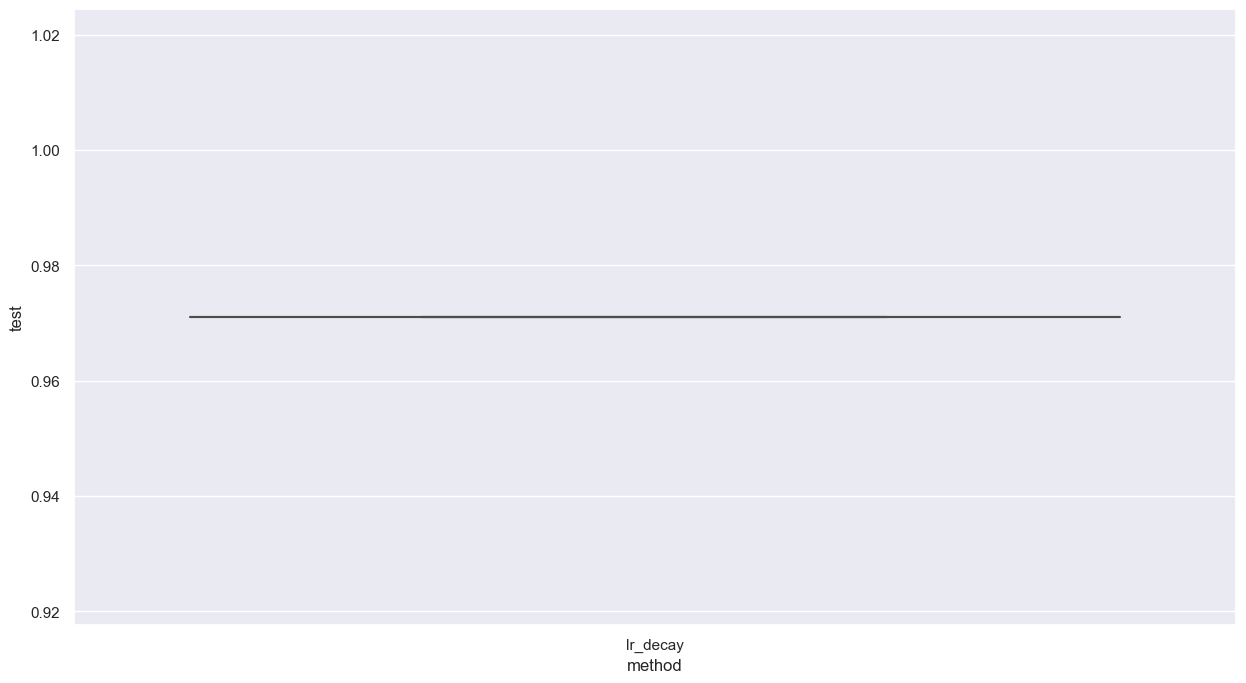


loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 51 , drnn: 0.0 , weight_std: 0.05 , flip: 0 , rotation: 0.0 , zoom: 0.0 , translation: 0.0 , contrast: 0.0 , shuffle: 0 , lr: 0.001 , optimizer: 0 , lr_decay: 46
0.9700000286102295
0.9722499847412109 0.9700000286102295


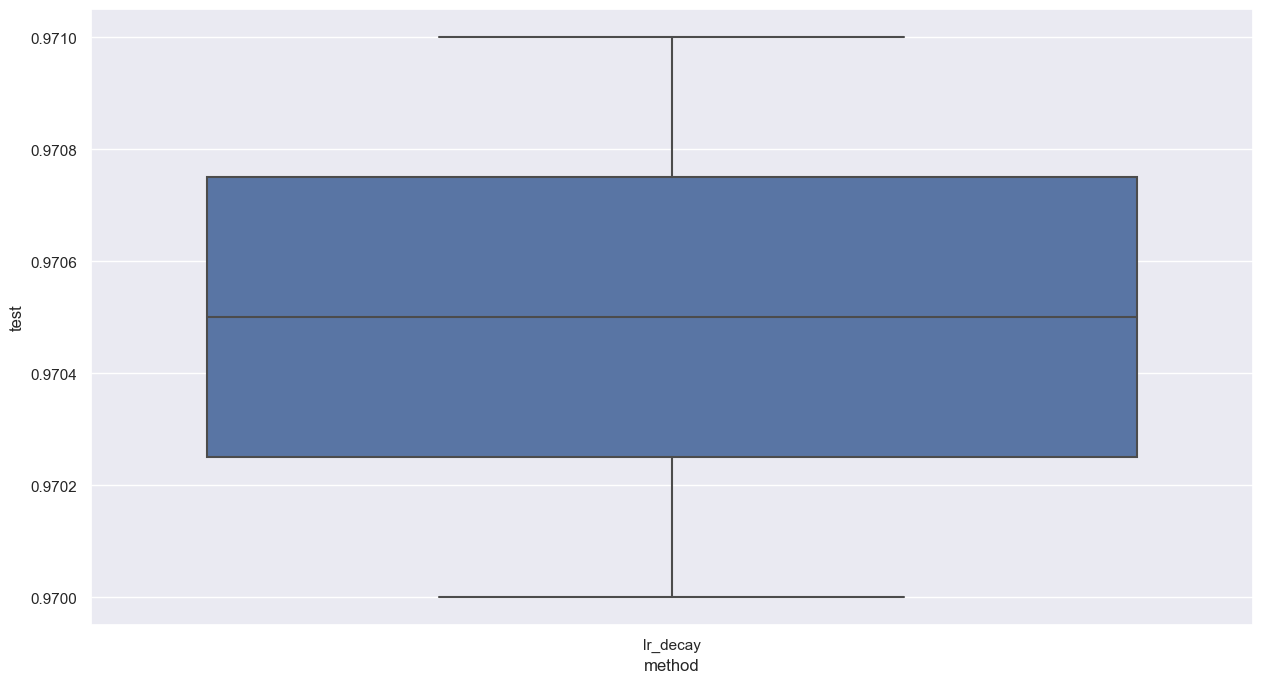


loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 51 , drnn: 0.0 , weight_std: 0.05 , flip: 0 , rotation: 0.0 , zoom: 0.0 , translation: 0.0 , contrast: 0.0 , shuffle: 0 , lr: 0.001 , optimizer: 0 , lr_decay: 46
0.9721999764442444
0.9725000262260437 0.9721999764442444


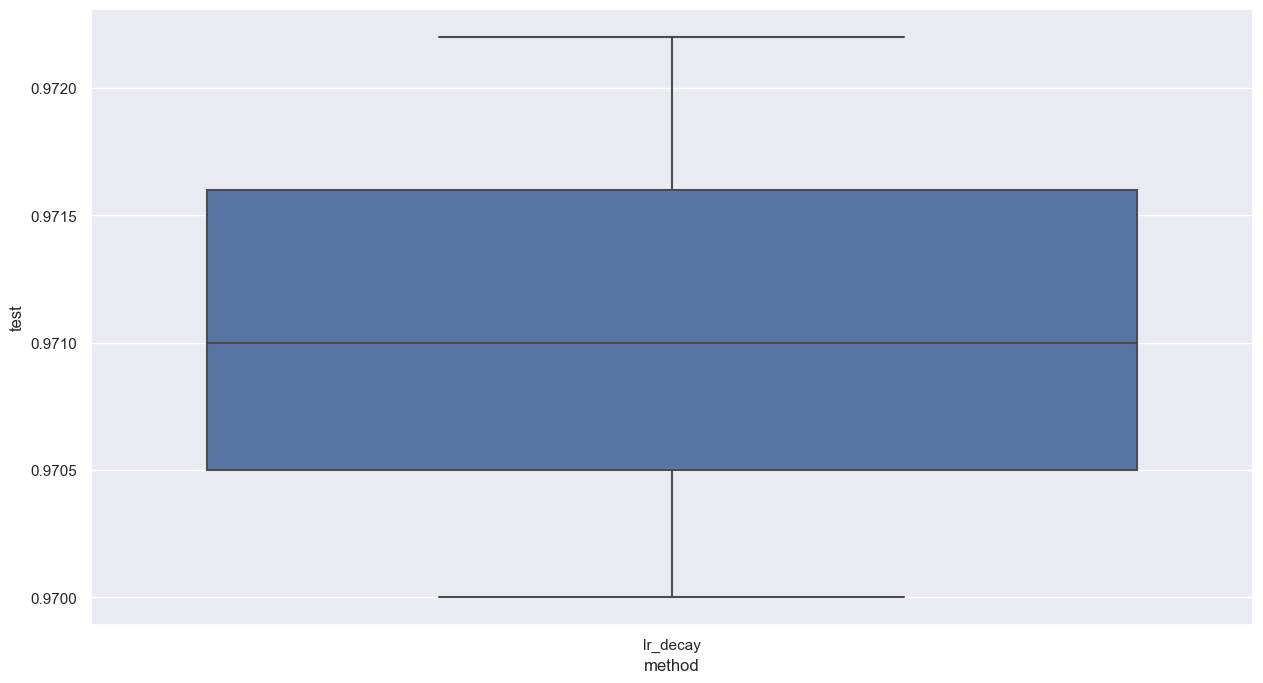


loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 51 , drnn: 0.0 , weight_std: 0.05 , flip: 0 , rotation: 0.0 , zoom: 0.0 , translation: 0.0 , contrast: 0.0 , shuffle: 0 , lr: 0.001 , optimizer: 0 , lr_decay: 46
0.9703999757766724
0.9698333144187927 0.9703999757766724


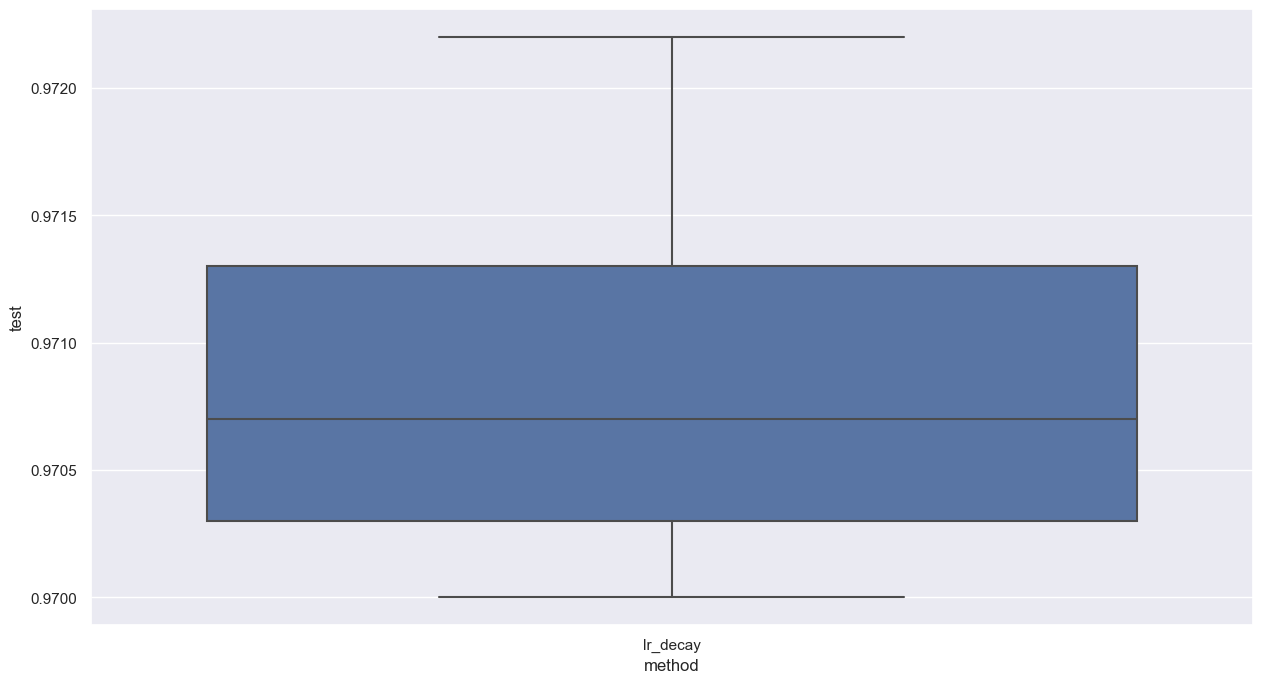


loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , label_smoothing: 0.0 , weight_noise: 0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 51 , drnn: 0.0 , weight_std: 0.05 , flip: 0 , rotation: 0.0 , zoom: 0.0 , translation: 0.0 , contrast: 0.0 , shuffle: 0 , lr: 0.001 , optimizer: 0 , lr_decay: 46
0.9721999764442444
0.9712499976158142 0.9721999764442444


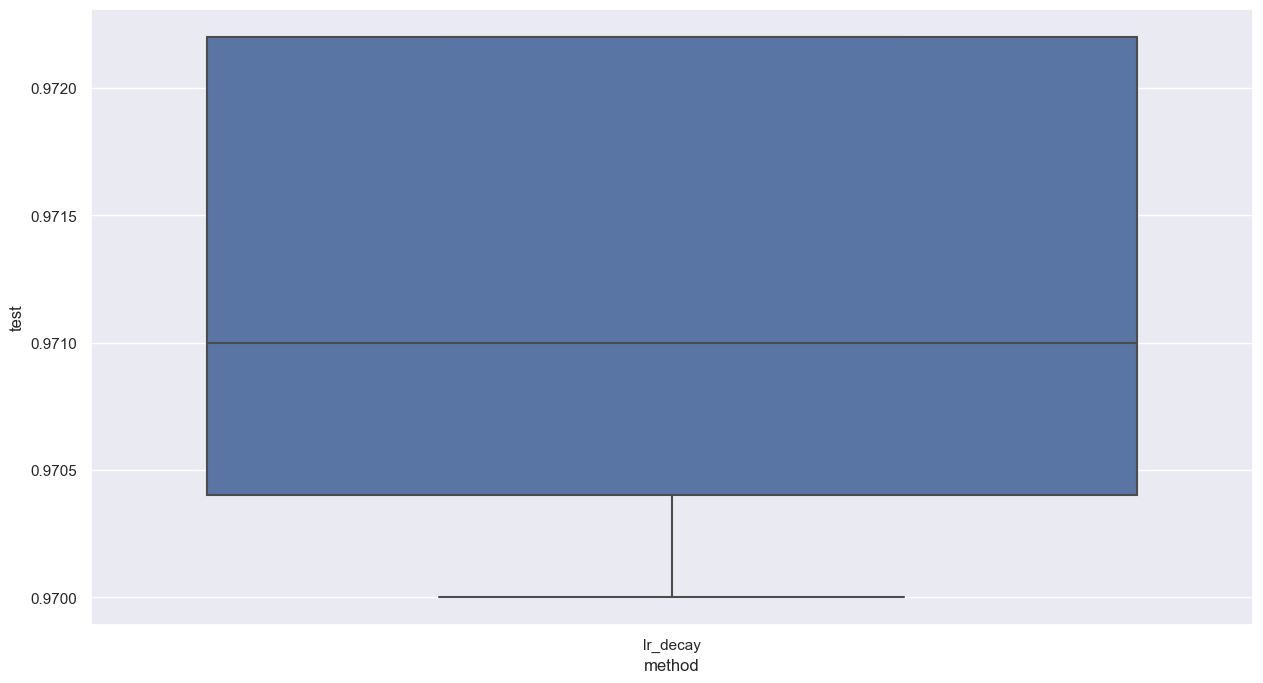

In [11]:
grid_log = pd.DataFrame(columns=['ind', 'validation'])

for choice, method in zip(range(len(methods)), methods):
    values = []
    fitnesses = []
    best_fitness = 0
    if (method != 'shuffle' and method != 'flip'):
        print('Grid search '+method)
        for value in np.linspace(bounds[choice][0], bounds[choice][1], 11)[1:]:
            tmp_setting = copy.copy(default_settings)
            tmp_setting[choice] = value
            fitness = NeuroEvolution.evaluate(tmp_setting, [nn])[0]
            grid_log.loc[len(grid_log)] = [tmp_setting, fitness]
            grid_log.to_excel('grid search log - mnist fc.xlsx', index=False)   


            if fitness > best_fitness:
                    best_fitness = fitness
                    best_ind = tmp_setting
                    print('New best', value, best_fitness)

            
    elif (method == 'shuffle'):
        print('Grid search '+method)
        tmp_setting = copy.copy(default_settings)
        tmp_setting[choice] = 1.0
        best_ind = tmp_setting
        fitness = NeuroEvolution.evaluate(tmp_setting, [nn])[0]
        grid_log.loc[len(grid_log)] = [tmp_setting, fitness]
        grid_log.to_excel('grid search log - mnist fc.xlsx', index=False) 
        
    elif (method == 'optimizer'):
        print('Grid search '+method)
        tmp_setting = copy.copy(default_settings)
        tmp_setting[choice] = 1.0
        best_ind = tmp_setting
        fitness = NeuroEvolution.evaluate(tmp_setting, [nn])[0]
        grid_log.loc[len(grid_log)] = [tmp_setting, fitness]
        grid_log.to_excel('grid search log - mnist fc.xlsx', index=False) 
    
    elif (method == 'flip'):
        print('Grid search '+method)
        for value in [1, 2, 3]:
            tmp_setting = copy.copy(default_settings)
            tmp_setting[choice] = value
            fitness = NeuroEvolution.evaluate(tmp_setting, [nn])[0]
            grid_log.loc[len(grid_log)] = [tmp_setting, fitness]
            grid_log.to_excel('grid search log - mnist fc.xlsx', index=False)   


            if fitness > best_fitness:
                    best_fitness = fitness
                    best_ind = tmp_setting
                    print('New best', best_fitness)

    
    for _ in range(5):
                fitness = NeuroEvolution.evaluate(best_ind, [nn], test_time=True)[0]
                row = []
                row .append(method)
                for value in best_ind:
                    row.append(value)
                row.append(fitness)
                exp_df.loc[len(exp_df)] = row
                sns.set(rc={'figure.figsize':(15,8)})
                sns.boxplot(x='method', y='test', data=exp_df)            
                plt.show()
    
    exp_df.to_excel('mnist-fc-pso-final-decay.xlsx', index=False)



# Random Search

In [23]:


population_size = 1000


for _ in range(1):
    best_fitness = 0
    best_ind = copy.copy(default_settings)
    star = Star(population_size)
    swarm = Swarm(star, population_size, ind_size, options, bounds, 0.2, bounded=True)
    counter = 0
    
    for i in range(population_size):
            choice = np.random.choice([1,2,3,4,5,6,7, 9, 10, 11, 12, 13, 19,20,21], 4, replace=False)
            for j in range(ind_size):
                if j not in choice and j not in [0, 8, 14, 15, 16, 17, 18]:
                    swarm.position[i][j] = default_settings[j]
    
    for ind in swarm.position:
            fitness = NeuroEvolution.evaluate(ind, [nn], test_time=False)[0]
            row = []
            print(counter)
            counter+=1
            
            if fitness > best_fitness:
                best_fitness = fitness
                best_ind = ind
                
                print('New best', best_fitness)
                
    for _ in range(5):
            fitness = NeuroEvolution.evaluate(best_ind, [nn], test_time=True)[0]
            row = []
            row .append('random-init')
            for value in best_ind:
                row.append(value)
            row.append(fitness)
            exp_df.loc[len(exp_df)] = row
            sns.set(rc={'figure.figsize':(15,8)})
            sns.boxplot(x='method', y='test', data=exp_df)            
            plt.show()



0
New best 0.9649999737739563
1
2


KeyboardInterrupt: 

In [15]:
population_size = 22



for _ in range(100):
    nn.dataset = dataset_train
    nn.epochs = epochs_search


    star = Star(population_size)
    swarm = Swarm(star, population_size, ind_size, options, bounds, 0.2, bounded=True)


        

    for i in range(population_size):
            choice = np.random.choice([1,2,3,4,5,6,7, 9, 10, 11, 12, 13, 19,20,21], 4, replace=False)
            for j in range(ind_size):
                if j not in choice and j not in [0, 8, 14, 15, 16, 17, 18]:
                    swarm.position[i][j] = default_settings[j]
    #for j in range(ind_size):
    #    swarm.position[0][j] = ind[j]
    #for i in range(1, population_size):
    #        for j in range(ind_size):
    #            if j not in [14,15,16,17,18,19,20] :
    #                swarm.position[i][j] = ind1[j]


    ost, pos, time_found = swarm.optimize(nn, steps=200, no_change=5, verbose=1)
    
    for _ in range(5):
        
            nn.dataset = dataset_test
            nn.epochs = epochs_test

            setting = pos
            if (setting[16] > 0):
                setting[16] = np.abs(setting[16])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test)
            else:
                setting[16] = -1 * (np.abs(setting[16])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test))
                
            if (setting[18] > 0):
                setting[18] = np.abs(setting[18])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test)
            else:
                setting[18] = -1 * (np.abs(setting[18])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test))
        
        

    
            fitness = NeuroEvolution.evaluate(setting, [nn], test_time=True)[0]
            row = []
            row .append('pso')
            for value in setting:
                row.append(value)
            row.append(fitness)
            exp_df.loc[len(exp_df)] = row
            sns.set(rc={'figure.figsize':(15,8)})
            sns.boxplot(x='method', y='test', data=exp_df)

            
            #plt.ylim(0.9, 1.0)2015
            plt.show()
    exp_df.to_excel(exp_file, index=False)

KeyboardInterrupt: 

In [17]:


for _ in range(1):
    nn.dataset = dataset_train
    nn.epochs = epochs_search


    population_size = 100

    star = Star(population_size)
    swarm = Swarm(star, population_size, ind_size, options, bounds, 0.2, bounded=True)
    
    for i in range(population_size):
            choice = np.random.choice([1,2,3,4,5,6,7, 9, 10, 11, 12, 13, 19,20,21], 4, replace=False)
            for j in range(ind_size):
                if j not in choice and j not in [0, 8, 14, 15, 16, 17, 18]:
                    swarm.position[i][j] = default_settings[j]
    
    epochs = 1
    metric = keras.metrics.CategoricalAccuracy()
    
    nn.set_config(shuffle, random_flip, random_rotation, random_zoom, random_translation, random_contrast, input_noise,
              label_smoothing, weight_std, dropout, drop_connect, drnn, activation_noise, loss_noise,
              optimizer, lr, lr_schedule, batch_size, batch_schedule, weight_noise, gradient_noise, gradient_dropout,              
              metric, epochs, iterations, patience, verbose=verbose,
              batch_range=batch_range, lr_range=lr_range, sleep=sleep, save_best=save_best, cut_threshold=cut_threshold)
    nn.create_model()



        

    #for i in range(population_size):
    #        choice = np.random.choice([0,1,2,3,4,5,6,7,10,12], 4, replace=False)
    #        for j in range(ind_size):
    #            if j not in choice and j not in [8,9,11,13,14]:
    #                   swarm.position[i][j] = default_settings[j]

    while (epochs < 20):
        ost, pos, time_found = swarm.optimize(nn, steps=0, no_change=np.inf, verbose=1)
        epochs *=20000
        metric = keras.metrics.CategoricalAccuracy()
    
        nn.set_config(shuffle, random_flip, random_rotation, random_zoom, random_translation, random_contrast, input_noise,
              label_smoothing, weight_std, dropout, drop_connect, drnn, activation_noise, loss_noise,
              optimizer, lr, lr_schedule, batch_size, batch_schedule, weight_noise, gradient_noise, gradient_dropout,              
              metric, epochs, iterations, patience, verbose=verbose,
              batch_range=batch_range, lr_range=lr_range, sleep=sleep, save_best=save_best, cut_threshold=cut_threshold)
        nn.create_model()
        #population_size = population_size//2
        #if (population_size < 5):
        #    population_size = 5
        population_size = 22
        migarted= []

        for idx in np.argpartition(swarm.pbest_cost,-population_size)[-population_size:]:
            migarted.append(swarm.pbest_pos[idx])
            #print(swarm.pbest_pos[idx], swarm.pbest_cost[idx])
        
        star = Star(population_size)
        swarm = Swarm(star, population_size, ind_size, options, bounds, 0.2, bounded=True)
        
        for i in range(population_size):
            for j in range(ind_size):
                swarm.position[i][j] = migarted[i][j]
        
    epochs = 20
    metric = keras.metrics.CategoricalAccuracy()
    
    nn.set_config(shuffle, random_flip, random_rotation, random_zoom, random_translation, random_contrast, input_noise,
              label_smoothing, weight_std, dropout, drop_connect, drnn, activation_noise, loss_noise,
              optimizer, lr, lr_schedule, batch_size, batch_schedule, weight_noise, gradient_noise, gradient_dropout,              
              metric, epochs, iterations, patience, verbose=verbose,
              batch_range=batch_range, lr_range=lr_range, sleep=sleep, save_best=save_best, cut_threshold=cut_threshold)
    nn.create_model()
    ost, pos, time_found = swarm.optimize(nn, steps=20000, no_change=3, verbose=1)
        
    
    for _ in range(5):
            nn.dataset = dataset_test
            nn.epochs = epochs_test

            setting = pos
            if (setting[16] > 0):
                setting[16] = np.abs(setting[16])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test)
            else:
                setting[16] = -1 * (np.abs(setting[16])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test))
                
            if (setting[18] > 0):
                setting[18] = np.abs(setting[18])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test)
            else:
                setting[18] = -1 * (np.abs(setting[18])*(epochs_search/epochs_test)+ 1 - (epochs_search/epochs_test))

    
            fitness = NeuroEvolution.evaluate(setting, [nn], test_time=True)[0]
            row = []
            row .append('pso-saga')
            for value in setting:
                row.append(value)
            row.append(fitness)
            exp_df.loc[len(exp_df)] = row
            sns.set(rc={'figure.figsize':(15,8)})
            sns.boxplot(x='method', y='test', data=exp_df)

            
            #plt.ylim(0.9, 1.0)2015
            plt.show()
    exp_df.to_excel(exp_file, index=False)

Best Particle =  0.9944 , Step =  1
Best Particle =  0.9944 , Step =  2
Best Particle =  0.9951 , Step =  3


KeyboardInterrupt: 

# Ablation by component

In [ ]:
directory = 'vgg mnist/'

files = [ '1.xlsx', '2.xlsx', '3.xlsx', '4.xlsx', '5.xlsx']

In [ ]:
##### import copy

#default_settings = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nn.max_batch, 100, 0.0, 0.1]
#default_settings = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 32, 1.0, 0.0, 0.05, 0.0]

nn.dataset = dataset_test
nn.epochs = 50

for file_name in files:
    exp_df = pd.read_excel(directory+file_name)

    settings = []
    for idx, row in exp_df[exp_df['method'] == 'pso-saga'].iloc[:, 1:].iterrows():
            setting = row.astype(np.float32)[:-1]
            print(setting)

            for i in range(len(methods)):
                if (setting[i] == default_settings[i]):
                    print(methods[i], setting[i])


                    line = []
                    line .append('No '+methods[i])
                    for value in setting:
                        line.append(value)
                    line.append(row[-1])



                else:
                    temp_setting = copy.copy(setting)
                    temp_setting[i] = default_settings[i]

                    if (methods[i] == 'batch schedule'):
                        temp_setting[i-1] = setting[i-1]
                    if (methods[i] == 'lr schedule'):
                        temp_setting[i-1] = setting[i-1]

                    fitness = NeuroEvolution.evaluate(temp_setting, [nn], test_time=True)[0]
                    line = []
                    line .append('No '+methods[i])
                    for value in temp_setting[:]:
                        line.append(value)
                    line.append(fitness)
                    

                exp_df.loc[len(exp_df)] = line
                sns.set(rc={'figure.figsize':(15,8)})
                sns.boxplot(x='method', y='test', data=exp_df)
                #plt.ylim(0.9, 1.0)
                plt.show()
                exp_df.to_excel(file_name, index=False)

            

In [ ]:
fitness

# Ablation by classification

In [ ]:
##### import copy

#default_settings = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nn.max_batch, 100, 0.0, 0.1]
#default_settings = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 32, 1.0, 0.0, 0.05, 0.0]

for file_name in files:
    exp_df = pd.read_excel(directory+file_name)

    settings = []
    for idx, row in exp_df[exp_df['method'] == 'pso-saga'].iloc[:, 1:].iterrows():
            setting = row.astype(np.float32)[:-1]
            print(setting)

            
            temp_setting = copy.copy(setting)
            for i in range(8):
                    temp_setting[i] = default_settings[i]


            fitness = NeuroEvolution.evaluate(temp_setting, [nn], test_time=True)[0]
            line = []
            line .append('No data noise')
            for value in temp_setting[:]:
                line.append(value)
            line.append(fitness)

            exp_df.loc[len(exp_df)] = line
            sns.set(rc={'figure.figsize':(15,8)})
            sns.boxplot(x='method', y='test', data=exp_df)
            #plt.ylim(0.9, 1.0)
            plt.show()
            exp_df.to_excel(file_name, index=False)
                
                
            temp_setting = copy.copy(setting)
            for i in range(8, 14):
                    temp_setting[i] = default_settings[i]


            fitness = NeuroEvolution.evaluate(temp_setting, [nn], test_time=True)[0]
            line = []
            line .append('No network noise')
            for value in temp_setting[:]:
                line.append(value)
            line.append(fitness)

            exp_df.loc[len(exp_df)] = line
            sns.set(rc={'figure.figsize':(15,8)})
            sns.boxplot(x='method', y='test', data=exp_df)
            #plt.ylim(0.9, 1.0)
            plt.show()
            exp_df.to_excel(file_name, index=False)
                
            temp_setting = copy.copy(setting)
            for i in range(14, 22):
                    temp_setting[i] = default_settings[i]


            fitness = NeuroEvolution.evaluate(temp_setting, [nn], test_time=True)[0]
            line = []
            line .append('No optimization noise')
            for value in temp_setting[:]:
                line.append(value)
            line.append(fitness)

            exp_df.loc[len(exp_df)] = line
            sns.set(rc={'figure.figsize':(15,8)})
            sns.boxplot(x='method', y='test', data=exp_df)
            #plt.ylim(0.9, 1.0)
            plt.show()
            exp_df.to_excel(file_name, index=False)

            